## IMPORTING DEPENDENCIES

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
from tensorflow import keras

import tensorflow as tf 
from sklearn.model_selection import train_test_split

## NEURAL NETWORK MODEL

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/Colab Notebooks/FYP/WaveletTransformDenoised/y_val.npy')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [ ]:
from keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation, Dropout
from keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from keras.layers import BatchNormalization
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
inputs = Input(X_train[0].shape)
dense1 = Dense(256, activation='relu')(inputs)
d1 = Dropout(0.5)(dense1)
dense2 = Dense(256, activation='relu')(d1)
d2 = Dropout(0.5)(dense2)

q = Dense(128)(d2)
k = Dense(128)(d2)
v = Dense(128)(d2)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 98)]         0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 256)          25344       ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 256)          0           ['dense_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 256)          65792       ['dropout[0][0]']                
                                                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=120)
model.save("/content/gdrive/MyDrive/Colab Notebooks/FYP/DNN-Multi-Head-Attention-Model_Augmented-LFCC-Wavelet.h5")

Epoch 1/120
528/528 [==============================] - 8s 5ms/step - loss: 0.7223 - accuracy: 0.5975 - val_loss: 0.5967 - val_accuracy: 0.7031
Epoch 2/120
528/528 [==============================] - 2s 4ms/step - loss: 0.6262 - accuracy: 0.6509 - val_loss: 0.5871 - val_accuracy: 0.6882
Epoch 3/120
528/528 [==============================] - 2s 4ms/step - loss: 0.5999 - accuracy: 0.6813 - val_loss: 0.5891 - val_accuracy: 0.6791
Epoch 4/120
528/528 [==============================] - 3s 6ms/step - loss: 0.5885 - accuracy: 0.6917 - val_loss: 0.5982 - val_accuracy: 0.6609
Epoch 5/120
528/528 [==============================] - 2s 5ms/step - loss: 0.5745 - accuracy: 0.7082 - val_loss: 0.5643 - val_accuracy: 0.7055
Epoch 6/120
528/528 [==============================] - 2s 4ms/step - loss: 0.5630 - accuracy: 0.7160 - val_loss: 0.5308 - val_accuracy: 0.7438
Epoch 7/120
528/528 [==============================] - 2s 4ms/step - loss: 0.5571 - accuracy: 0.7195 - val_loss: 0.5428 - val_accuracy: 0.7308

In [ ]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.7885
[0.4207909405231476, 0.7885253429412842]


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=ee438a966a994df7ccc4772f13c168f3941787a386fb74c51db9342f39126d04
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=a43df1803a8956235012724736bee572904bb08214ea301688601536011b391b
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

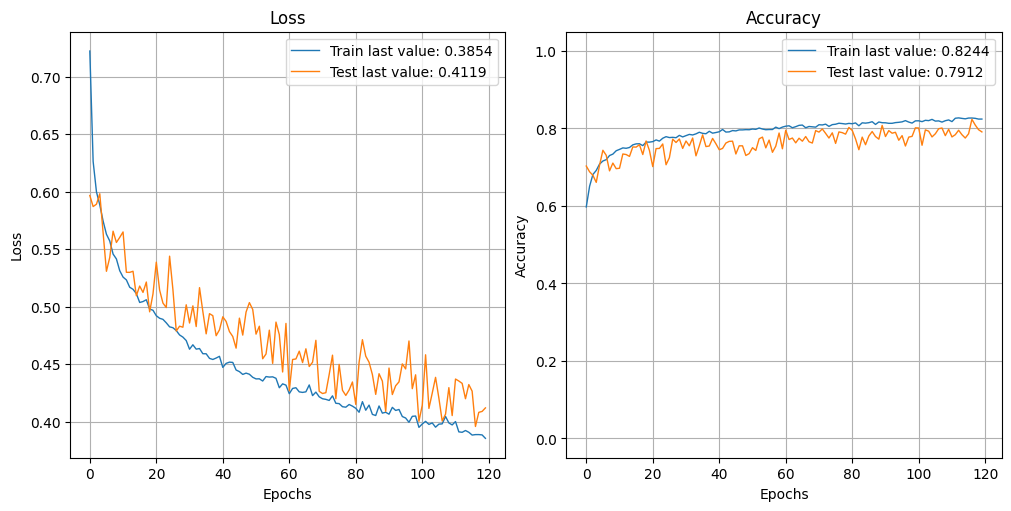

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      1049
           1       0.71      0.97      0.82      1060

    accuracy                           0.79      2109
   macro avg       0.83      0.79      0.78      2109
weighted avg       0.83      0.79      0.78      2109

Confusion matrix, without normalization
[[ 631  418]
 [  28 1032]]


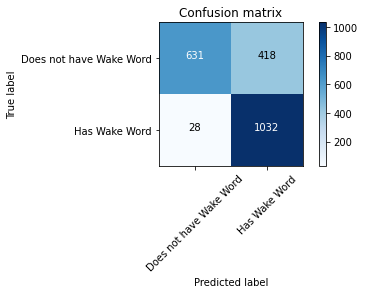

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])